In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [57]:
df = pd.read_csv('../data/overfitting.csv')
df.head()

,case_id,train,Target_Practice,Target_Leaderboard,Target_Evaluate,var_1,var_2,var_3,var_4,var_5,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
0,1,1,0,1,0,0.660,0.106,0.434,0.387,0.903,...,0.015,0.377,0.479,0.050,0.395,0.123,0.833,0.461,0.990,0.105
1,2,1,1,0,1,0.844,0.813,0.030,0.939,0.721,...,0.112,0.048,0.088,0.860,0.560,0.346,0.511,0.883,0.858,0.599
2,3,1,0,0,0,0.560,0.567,0.568,0.434,0.414,...,0.874,0.236,0.599,0.602,0.005,0.493,0.122,0.395,0.782,0.943
3,4,1,0,1,1,0.681,0.245,0.909,0.785,0.738,...,0.219,0.691,0.261,0.031,0.968,0.353,0.798,0.104,0.944,0.090
4,5,1,0,1,0,0.846,0.431,0.805,0.237,0.465,...,0.704,0.242,0.089,0.605,0.577,0.043,0.686,0.070,0.666,0.572


In [58]:
target_col = 'Target_Practice'
# target_col = 'Target_Leaderboard'
drop_cols = ['train','case_id','Target_Practice','Target_Leaderboard','Target_Evaluate']

In [59]:
df_train = df.loc[df['train']==1]
train_case_id = df_train['case_id']
train_target = df_train[target_col]
df_train = df_train.drop(columns=drop_cols, axis=1)
df_train.shape

(250, 200)

In [60]:
df_test = df.loc[df['train']==0]
test_case_id = df_test['case_id']
test_target = df_test[target_col]
df_test = df_test.drop(columns=drop_cols, axis=1)
df_test.shape

(19750, 200)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [62]:
X_train = df_train.to_numpy()
y_train = train_target.to_numpy()

### Logistic Regression

In [63]:
grid = {'C':np.logspace(-3,3,7)}
logit = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_cv = GridSearchCV(estimator=logit, param_grid=grid, cv=10)
logit_cv.fit(X_train, y_train)
print('logistic regression: best params:', logit_cv.best_params_)
print('logistic regression: best score:', logit_cv.best_score_)

logistic regression: best params: {'C': 100.0}
logistic regression: best score: 0.768


/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [64]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [65]:
X_test = df_test.to_numpy()
y_test = test_target.to_numpy()

In [66]:
y_pred = logit_cv.best_estimator_.predict(X_test)

In [67]:
pd.DataFrame(y_pred).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Data columns (total 1 columns):
0    19750 non-null int64
dtypes: int64(1)
memory usage: 154.4 KB


### SVM

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,roc_curve

In [69]:
grid_svm = {'C':np.logspace(-3,3,7), 'gamma':np.logspace(-3,3,7)}
svm_clf = SVC()
svm_clf_cv = GridSearchCV(estimator=svm_clf, param_grid=grid_svm, cv=10)
svm_clf_cv.fit(X_train, y_train)
y_pred = svm_clf_cv.predict(X_test)
confusion_matrix(y_test,y_pred)
roc_curve(y_test,y_pred)

/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(array([0.        , 0.23544253, 1.        ]),
 array([0.        , 0.78996037, 1.        ]),
 array([2, 1, 0]))

In [70]:
confusion_matrix(y_test,y_pred)

array([[7576, 2333],
       [2067, 7774]])

In [71]:
svm_clf_cv.best_params_

{'C': 10.0, 'gamma': 0.01}

In [72]:
df_train.columns

Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10',
       ...
       'var_191', 'var_192', 'var_193', 'var_194', 'var_195', 'var_196',
       'var_197', 'var_198', 'var_199', 'var_200'],
      dtype='object', length=200)

## Visualize Decision Boundary

In [73]:
X_train.shape, y_train.shape

((250, 200), (250,))

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)

In [75]:
# make meshgrid
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [76]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [77]:
# # classifier
# from sklearn import svm
# model = svm.SVC(kernel='rbf')
# clf = model.fit(X_train_reduced, y_train)

In [78]:
grid_svm = {'C':np.logspace(-3,3,7), 'gamma':np.logspace(-3,3,7)}
svm_clf = SVC()
svm_clf_cv = GridSearchCV(estimator=svm_clf, param_grid=grid_svm, cv=10)
svm_clf_cv.fit(X_train_reduced, y_train)

/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
np.exp2(np.arange(1,12,1)).astype('int')

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048])

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_rf = {'n_estimators':np.exp2(np.arange(4,12,1)).astype('int'), 
           'max_depth':np.arange(2,5,1)
#            'min_samples_split':np.arange(2,10,1)
          }
rf_clf = RandomForestClassifier(random_state=7)
rf_clf_cv = GridSearchCV(estimator=rf_clf, param_grid=grid_rf, cv=10)

In [102]:
rf_clf_cv.fit(X_train, y_train)

/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([  16,   32,   64,  128,  256,  512, 1024, 2048]), 'max_depth': array([2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
rf_clf_cv.best_params_, rf_clf_cv.best_score_

({'max_depth': 4, 'n_estimators': 256}, 0.636)

In [106]:
from sklearn.metrics import confusion_matrix
y_pred = rf_clf_cv.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[4719, 5190],
       [1674, 8167]])

In [82]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf_cv.predict(pca.transform(X_test))
confusion_matrix(y_test,y_pred)

array([[3739, 6170],
       [3750, 6091]])

In [80]:
clf = svm_clf_cv

No handles with labels found to put in legend.


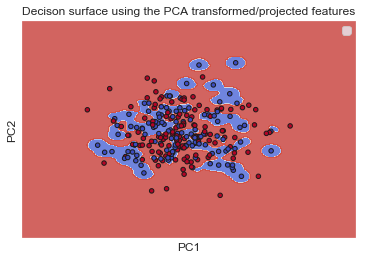

In [81]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train_reduced[:, 0], X_train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()


## TSNE High-Dimensional Space Visualization

No handles with labels found to put in legend.


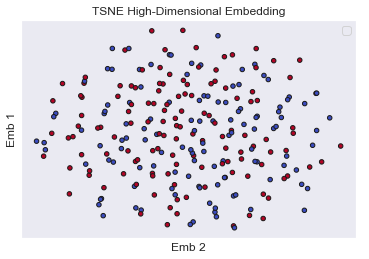

In [85]:
from sklearn.manifold import TSNE
X_train_embedded = TSNE().fit_transform(X_train)

fig, ax = plt.subplots()
# title for the plots
title = ('TSNE High-Dimensional Embedding')
# # Set-up grid for plotting.
X0, X1 = X_train_embedded[:, 0], X_train_embedded[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Emb 1')
ax.set_xlabel('Emb 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


Looks like targets are completely mixed up

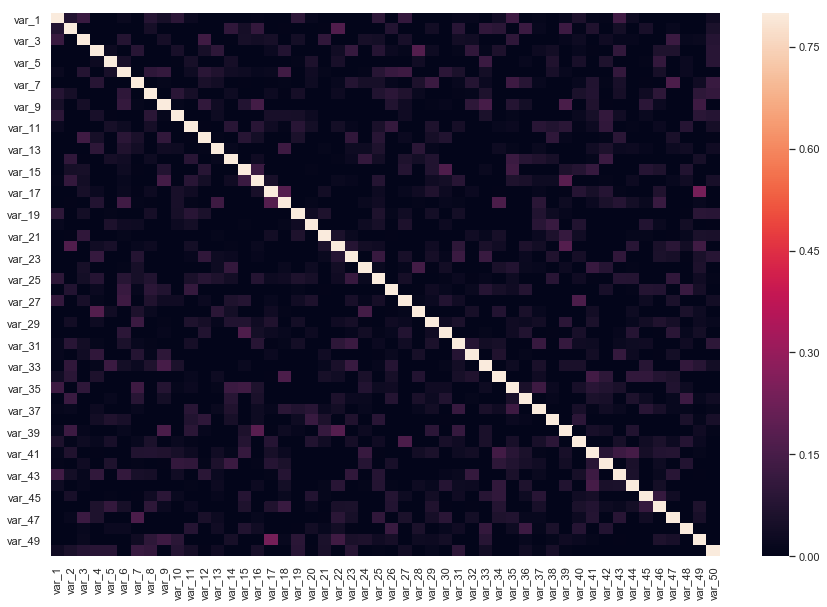

In [115]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_train.iloc[:,:50].corr(),vmin=0,vmax=0.8,ax=ax)

In [148]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# scalar = StandardScaler()
# scalar = RobustScaler()
scalar = MinMaxScaler()

df_ = df_train
y_  = y_train

df_ = pd.DataFrame(scalar.fit_transform(df_), columns=df_.columns, index=df_.index)
df_.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
0,0.665990,0.101610,0.431749,0.386935,0.909553,0.665992,0.157360,0.287009,0.209629,0.944388,...,0.008073,0.375125,0.487206,0.045732,0.393970,0.121827,0.830800,0.459920,0.990964,0.102513
1,0.852792,0.812877,0.023256,0.941709,0.724593,0.287449,0.544162,0.874119,0.788365,0.738119,...,0.105954,0.045135,0.087001,0.868902,0.559799,0.348223,0.504559,0.882766,0.858434,0.598995
2,0.564467,0.565392,0.567240,0.434171,0.412602,0.179150,0.451777,0.888218,0.022066,0.695652,...,0.874874,0.233701,0.610031,0.606707,0.002010,0.497462,0.110436,0.393788,0.782129,0.944724
3,0.687310,0.241449,0.912032,0.786935,0.741870,0.573887,0.699492,0.407855,0.181545,0.523761,...,0.213925,0.690070,0.264074,0.026423,0.969849,0.355330,0.795339,0.102204,0.944779,0.087437
4,0.854822,0.428571,0.806876,0.236181,0.464431,0.646761,0.219289,0.096677,0.796389,0.130435,...,0.703330,0.239719,0.088025,0.609756,0.576884,0.040609,0.681864,0.068136,0.665663,0.571859


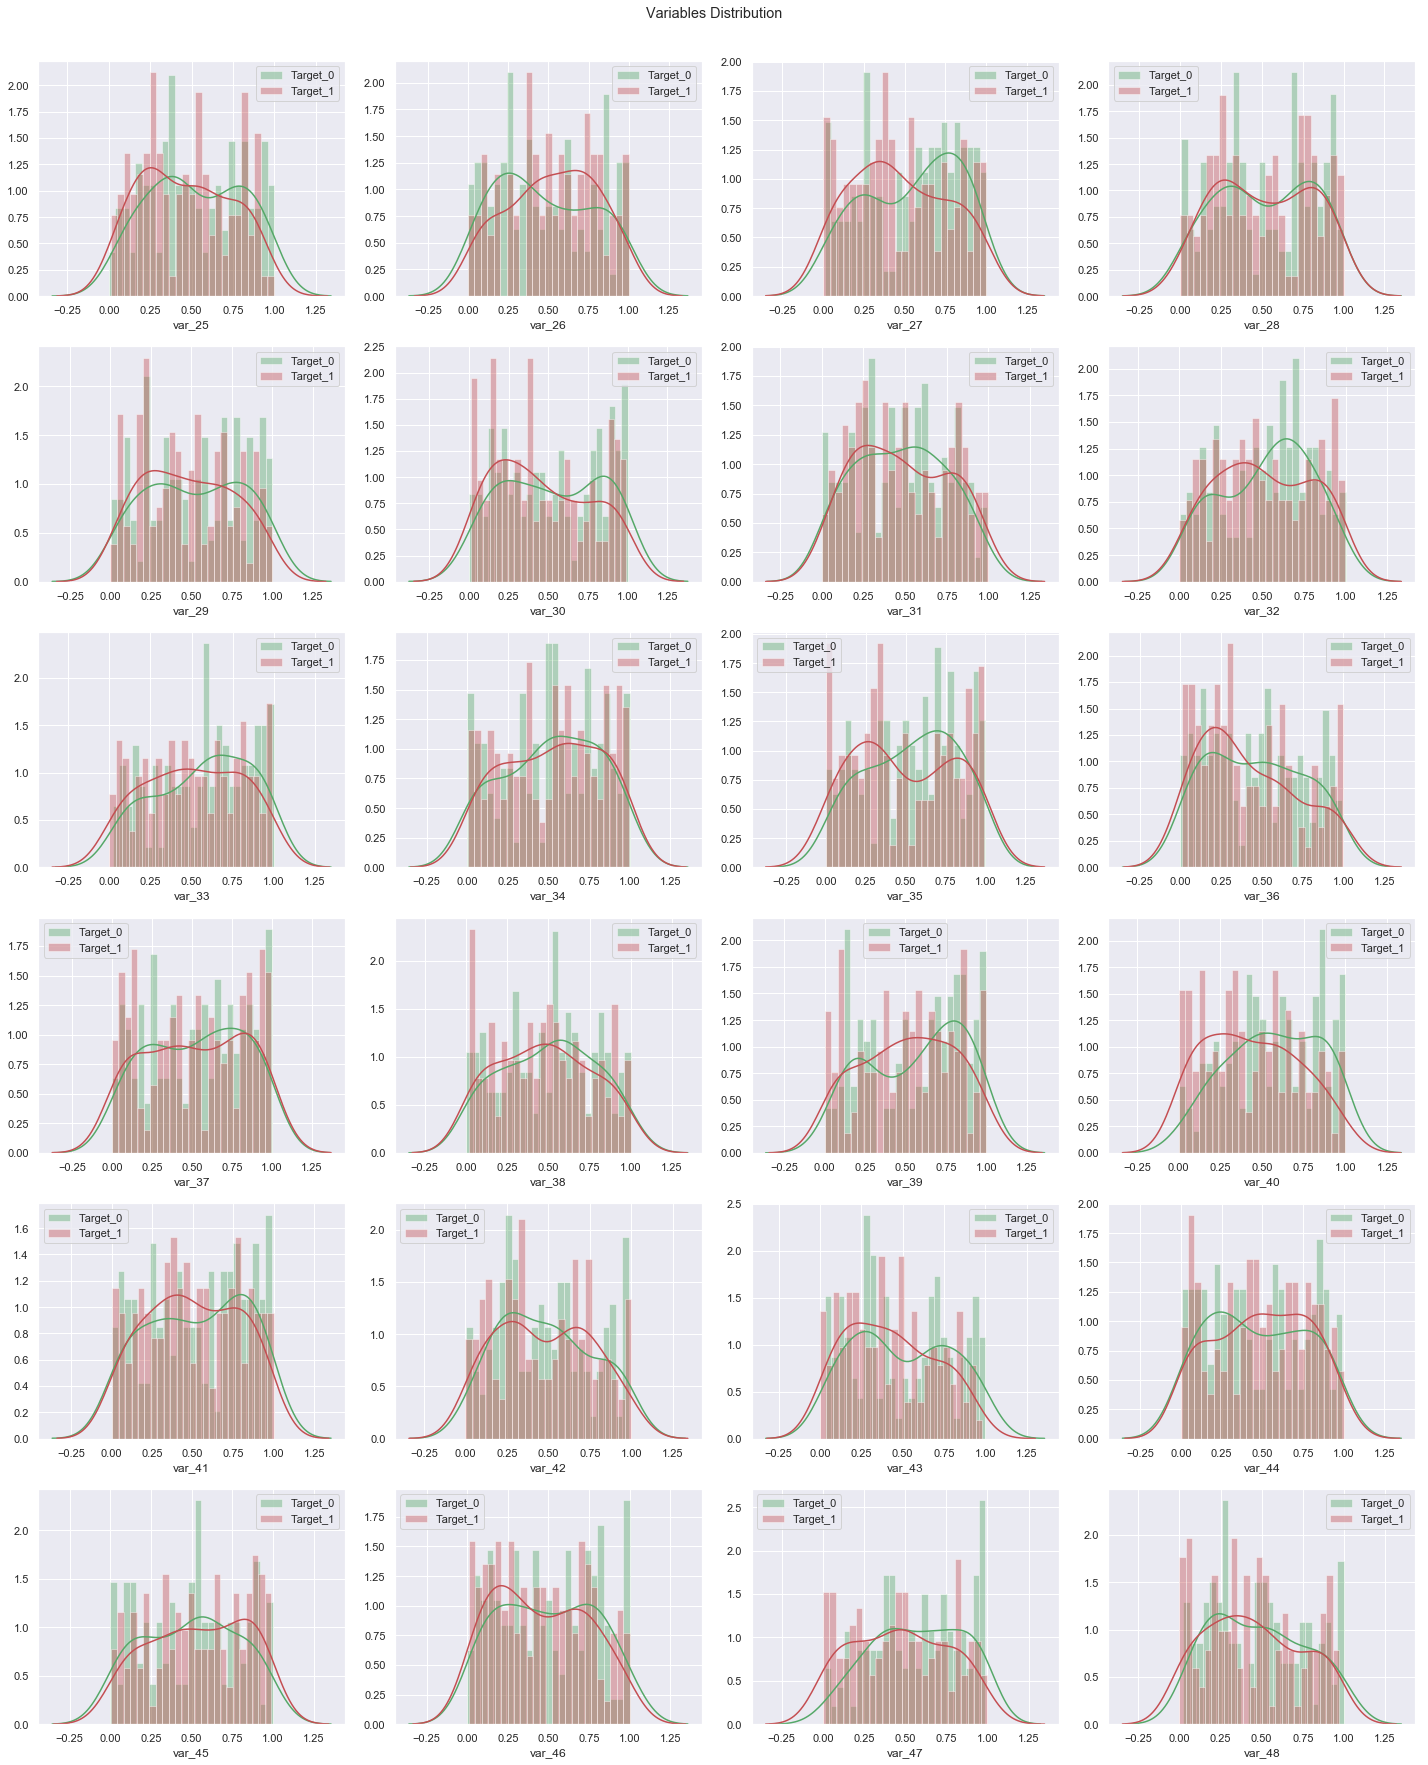

In [149]:

fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_train.columns[24:48]:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df_[i][y_==0], color='g', label = 'Target_0', bins=25)
    sns.distplot(df_[i][y_==1], color='r', label = 'Target_1', bins=25)
    plt.legend(loc='best')
#     plt.title(i)
fig.suptitle('Variables Distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [150]:
df_corr = df_.corr()
df_corr['var_1'].sort_values(ascending=False)

var_1      1.000000
var_68     0.150514
var_83     0.150185
var_107    0.137398
var_43     0.134931
var_35     0.128647
var_85     0.120999
var_3      0.120158
var_72     0.118808
var_27     0.108833
var_162    0.106173
var_134    0.104157
var_138    0.103823
var_153    0.103080
var_91     0.099916
var_19     0.094659
var_25     0.094085
var_10     0.093384
var_97     0.091436
var_114    0.090898
var_139    0.087400
var_164    0.086433
var_81     0.086131
var_149    0.084066
var_189    0.082963
var_8      0.079447
var_146    0.078314
var_74     0.075517
var_104    0.074148
var_2      0.072701
             ...   
var_7     -0.063520
var_187   -0.063768
var_30    -0.064475
var_66    -0.064554
var_56    -0.065600
var_60    -0.065675
var_61    -0.065853
var_80    -0.066075
var_101   -0.068257
var_99    -0.068518
var_12    -0.068879
var_5     -0.074366
var_98    -0.076135
var_140   -0.078145
var_23    -0.080422
var_58    -0.082470
var_135   -0.090291
var_147   -0.092376
var_49    -0.094045


#### Feature selection using pvalue

In [151]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns


In [158]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(df_.values, train_target.values, SL, df_.columns)


In [159]:
selected_columns

Index(['var_4', 'var_5', 'var_6', 'var_7', 'var_13', 'var_16', 'var_17',
       'var_19', 'var_21', 'var_22', 'var_26', 'var_28', 'var_32', 'var_39',
       'var_40', 'var_48', 'var_49', 'var_50', 'var_52', 'var_55', 'var_66',
       'var_72', 'var_75', 'var_80', 'var_83', 'var_84', 'var_99', 'var_103',
       'var_108', 'var_109', 'var_113', 'var_114', 'var_115', 'var_116',
       'var_117', 'var_118', 'var_124', 'var_130', 'var_141', 'var_142',
       'var_146', 'var_158', 'var_162', 'var_165', 'var_168', 'var_169',
       'var_174', 'var_177', 'var_179', 'var_181', 'var_183', 'var_192',
       'var_194', 'var_198'],
      dtype='object')

In [162]:
df_train_reduced = pd.DataFrame(data = data_modeled, columns = selected_columns)
df_train_reduced.head()

,var_4,var_5,var_6,var_7,var_13,var_16,var_17,var_19,var_21,var_22,...,var_168,var_169,var_174,var_177,var_179,var_181,var_183,var_192,var_194,var_198
0,0.386935,0.909553,0.665992,0.157360,0.368952,0.309930,0.531062,0.141141,0.030181,0.643585,...,0.714286,0.050150,0.159068,0.898798,0.428283,0.508065,0.452357,0.375125,0.045732,0.459920
1,0.941709,0.724593,0.287449,0.544162,0.299395,0.776329,0.538076,0.956957,0.119718,0.995927,...,0.054326,0.907723,0.827761,0.466934,0.424242,0.353831,0.027081,0.045135,0.868902,0.882766
2,0.434171,0.412602,0.179150,0.451777,0.428427,0.458375,0.347695,0.146146,1.000000,0.872709,...,0.891348,0.250752,0.574468,0.980962,0.075758,0.536290,0.271815,0.233701,0.606707,0.393788
3,0.786935,0.741870,0.573887,0.699492,0.149194,0.138415,0.113226,0.104104,0.192153,0.158859,...,0.349095,0.160481,0.281662,0.405812,0.094949,0.401210,0.335005,0.690070,0.026423,0.102204
4,0.236181,0.464431,0.646761,0.219289,0.380040,0.679037,0.757515,0.115115,0.267606,0.729124,...,0.156942,0.981946,0.277609,0.476954,0.073737,0.317540,0.508526,0.239719,0.609756,0.068136


In [171]:
grid_svm = {'C':np.logspace(-3,3,7), 'gamma':np.logspace(-3,3,7)}
svm_clf = SVC()
svm_clf_cv = GridSearchCV(estimator=svm_clf, param_grid=grid_svm, cv=10)
svm_clf_cv.fit(df_train_reduced.to_numpy(), y_train)
print(svm_clf_cv.best_score_)
from sklearn.metrics import confusion_matrix, scorer
y_pred = svm_clf_cv.predict(df_test.loc[:,selected_columns].to_numpy())
scorer.accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)

0.816


/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.594379746835443, array([[5440, 4469],
        [3542, 6299]]))

In [167]:
grid = {'C':np.logspace(-3,3,7)}
logit = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_cv = GridSearchCV(estimator=logit, param_grid=grid, cv=10)
logit_cv.fit(df_train_reduced.to_numpy(), y_train)
print('logistic regression: best params:', logit_cv.best_params_)
print('logistic regression: best score:', logit_cv.best_score_)

logistic regression: best params: {'C': 100.0}
logistic regression: best score: 0.808


/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [170]:
y_pred = logit_cv.predict(df_test.loc[:,selected_columns].to_numpy())
from sklearn.metrics import scorer
scorer.accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred)

(0.5918987341772152, array([[5416, 4493],
        [3567, 6274]]))